# Classification
## Import Libraries

In [103]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot

sb.set() # set the default Seaborn style for graphics

## Import Cleaned Data from the Data Preparation step earlier.

In [104]:
data = pd.read_csv('Data/cleaned.csv')
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,inn00001,2,0,1,2,meal plan 1,0,room_type 1,224,2017,10,2,offline,0,0,0,65.00,0,not_canceled
1,inn00002,2,0,2,3,not selected,0,room_type 1,5,2018,11,6,online,0,0,0,106.68,1,not_canceled
2,inn00003,1,0,2,1,meal plan 1,0,room_type 1,1,2018,2,28,online,0,0,0,60.00,0,canceled
3,inn00004,2,0,0,2,meal plan 1,0,room_type 1,211,2018,5,20,online,0,0,0,100.00,0,canceled
4,inn00005,2,0,1,1,not selected,0,room_type 1,48,2018,4,11,online,0,0,0,94.50,0,canceled


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### From the above info, we can see that in the dataset, we have many categorical attributes. In order to perform classification, additional data preprocessing has to be done.

### Let's take a look at the attributes that are non-numerical (Categorical)

In [106]:
non_numerical_data = data.select_dtypes(exclude=['int64', 'float64', 'int32', 'float32'])
non_numerical_data.head()

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,inn00001,meal plan 1,room_type 1,offline,not_canceled
1,inn00002,not selected,room_type 1,online,not_canceled
2,inn00003,meal plan 1,room_type 1,online,canceled
3,inn00004,meal plan 1,room_type 1,online,canceled
4,inn00005,not selected,room_type 1,online,canceled


### Let's also explore what are the possible values given the different categorical attributes. From this, we can identify nominal and ordinal categories, this is important since we would use different preprocessing method depending on the category type. 

For example, for <b>ordinal data</b> (e.g. Low, med high), there is a natural order to the data, and hence we could replace the values using ordinal encoding, where we map each category with numbers to represent that order.

For <b>nominal data</b> (e.g. Red Blue Green), there is no natural order, we cannot simply apply the same strategy as above, since that would imply an artificial order for the data, which is not true. In this case, a strategy we could use is one-hot encoding.

In [107]:
print("Booking_ID unique values: ", data['Booking_ID'].unique(), "\n")
print("type_of_meal_plan unique values: ", data['type_of_meal_plan'].unique(), "\n")
print("room_type_reserved unique values: ", data['room_type_reserved'].unique(), "\n")
print("market_segment_type unique values: ", data['market_segment_type'].unique(), "\n")
print("booking_status unique values: ", data['booking_status'].unique(), "\n")


Booking_ID unique values:  ['inn00001' 'inn00002' 'inn00003' ... 'inn36273' 'inn36274' 'inn36275'] 

type_of_meal_plan unique values:  ['meal plan 1' 'not selected' 'meal plan 2' 'meal plan 3'] 

room_type_reserved unique values:  ['room_type 1' 'room_type 4' 'room_type 2' 'room_type 6' 'room_type 5'
 'room_type 7' 'room_type 3'] 

market_segment_type unique values:  ['offline' 'online' 'corporate' 'aviation' 'complementary'] 

booking_status unique values:  ['not_canceled' 'canceled'] 



### Based on observations, we can see a few observations:
1. Each Booking_ID is unique for each row, this attribute is only used as an identifier to a row, this also means that these are arbitrary values that do not contain any information that helps the model learn patterns related to the target variable, hence we can actually exclude this attribute during our model training.
2. All of the categories appears to be of nominal data type, where there is no real natural order, hence a good strategy we can use here would be one-hot encoding. One-hot encoding creates a binary column for each category and gives a 1 or 0 value to indicate true or false.
3. For Booking_Status, this is actually our target attribute, it only has two possible values (canceled and not_canceled), in this case, we can just use a label encoding to transform the values into a binary value (1 and 0).

In [108]:
# Drop the Booking_ID column as this will not be helpful in training the classification model.
data = data.drop('Booking_ID', axis = 1)

In [109]:
# Numerical Data
data_num = data.select_dtypes(include=['int64', 'float64', 'int32', 'float32'])
data_num.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0


In [110]:
# Import OneHotEncoder from Sklearn library
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

# Categorical Data (Excluding Target Attribute) - To Perform One-Hot Encoding
data_cat = data[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']]
ohe.fit(data_cat)
data_cat_ohe = pd.DataFrame(ohe.transform(data_cat).toarray(),
                            columns=ohe.get_feature_names_out(data_cat.columns))
data_cat_ohe.head()

,type_of_meal_plan_meal plan 1,type_of_meal_plan_meal plan 2,type_of_meal_plan_meal plan 3,type_of_meal_plan_not selected,room_type_reserved_room_type 1,room_type_reserved_room_type 2,room_type_reserved_room_type 3,room_type_reserved_room_type 4,room_type_reserved_room_type 5,room_type_reserved_room_type 6,room_type_reserved_room_type 7,market_segment_type_aviation,market_segment_type_complementary,market_segment_type_corporate,market_segment_type_offline,market_segment_type_online
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [111]:
# Categorical Data (Target Attribute [Canceled, Not_Canceled]) - Replace values with 0 and 1
data_booking_status = data['booking_status']
data_booking_status.replace(to_replace='canceled', value=1, inplace=True)
data_booking_status.replace(to_replace='not_canceled',  value=0, inplace=True)
data_booking_status.head()

0    0
1    0
2    1
3    1
4    1
Name: booking_status, dtype: int64

In [112]:
# Add the data columns (numerical + categorical + target) together after the preprocessing
data = pd.concat([data_num.reset_index(drop=True), data_cat_ohe.reset_index(drop=True), data_booking_status.reset_index(drop=True)], axis=1)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_room_type 4,room_type_reserved_room_type 5,room_type_reserved_room_type 6,room_type_reserved_room_type 7,market_segment_type_aviation,market_segment_type_complementary,market_segment_type_corporate,market_segment_type_offline,market_segment_type_online,booking_status
0,2,0,1,2,0,224,2017,10,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,2,0,2,3,0,5,2018,11,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,1,0,2,1,0,1,2018,2,28,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


Before we continue with classification, after the new preprocessing the data, it will be great to have a quick overview of correlation between the new columns and the booking_status target attribute.


<AxesSubplot:>

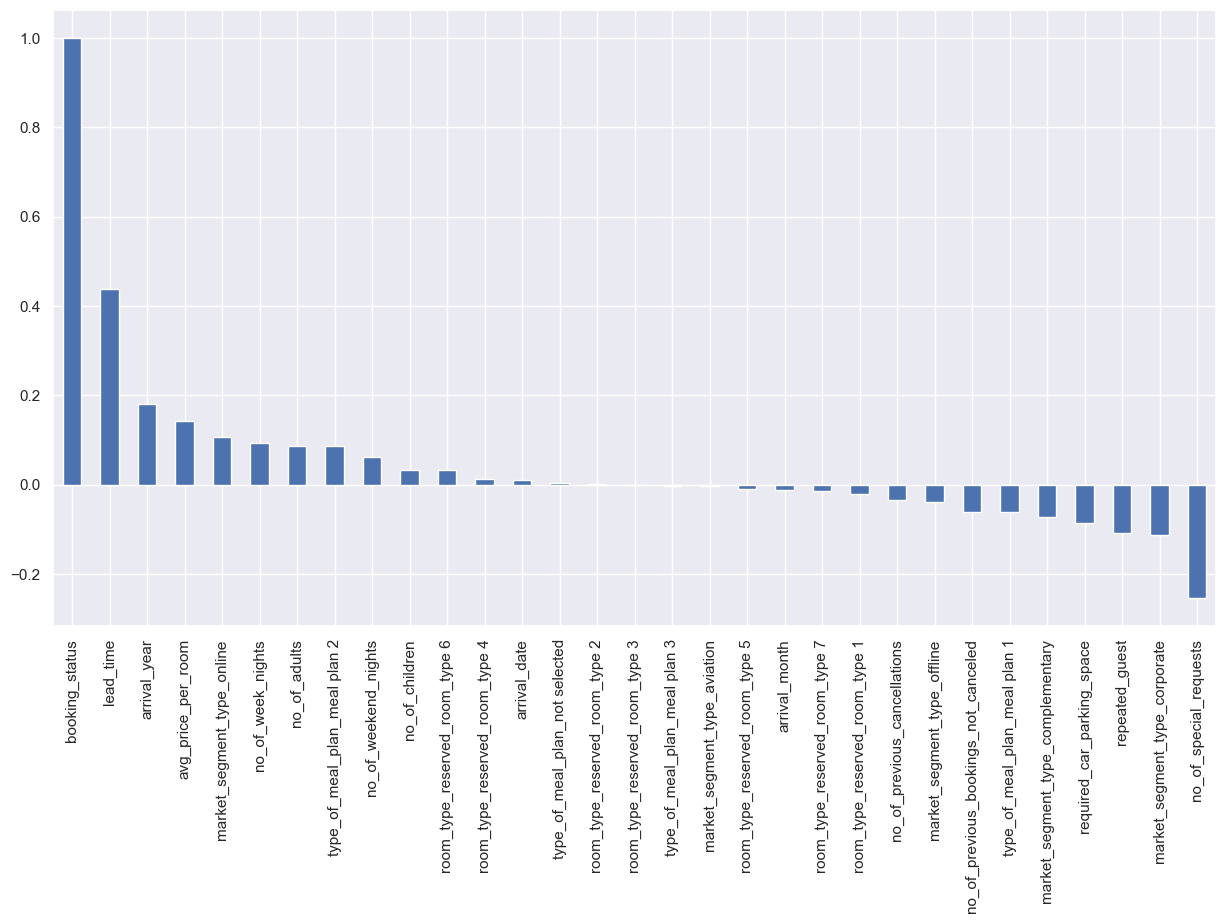

In [113]:
plt.figure(figsize=(15,8))
data.corr()['booking_status'].sort_values(ascending = False).plot(kind = 'bar')

## Attempt 1 - Try to run basic classification models against current preprocessed dataset without any additional tuning (i.e. hyper parameter tuning, feature selection and etc). 


In [114]:
# Import all essential functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [115]:
# Y refers to the actual result 
# X refers to the predictors, used to predict the target variable
Y = pd.DataFrame(data['booking_status'])
X = pd.DataFrame(data.drop('booking_status', axis = 1))

##### We will split data into 80% train 20% test split as a starting point.

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

print("Train Set :", Y_train.shape, X_train.shape)
print("Test Set  :", Y_test.shape, X_test.shape)

Train Set : (29020, 1) (29020, 30)
Test Set  : (7255, 1) (7255, 30)


### Linear Regression Model (With Threshold of 0.5)

In [117]:
from sklearn.linear_model import LinearRegression

linearRegModel = LinearRegression().fit(X_train, Y_train)

# Predict on the training and test data
Y_train_pred = linearRegModel.predict(X_train)
Y_test_pred = linearRegModel.predict(X_test)

After training, we need to do an additional step of using a threshold to convert predictions to binary classes, this is because linear regression is typically used to predict a continuous outcome.

In [118]:
Y_train_pred_class = np.where(Y_train_pred > 0.5, 1, 0)
Y_test_pred_class = np.where(Y_test_pred > 0.5, 1, 0)

#### Plot Confusion Matrix for Linear Regression Model (with Threshold of 0.5)

Train and Test Data Confusion Matrix:


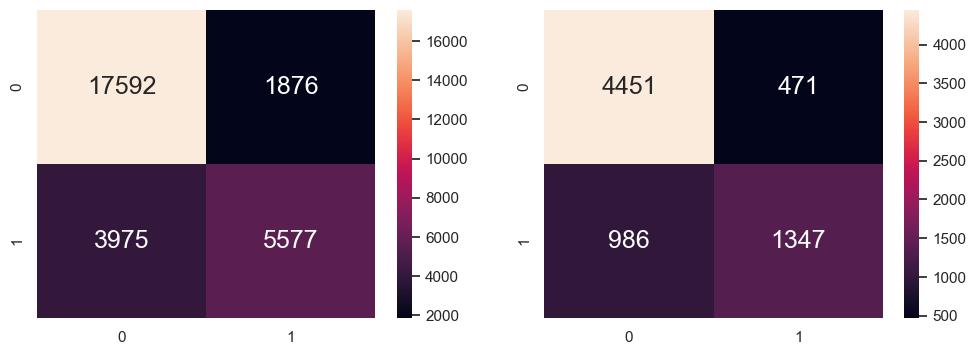

In [119]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred_class),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred_class), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Train and Test Data Confusion Matrix:")

#### Calculate General Metrics for Linear Regression Model (With Threshold of 0.5)

In [120]:
# Calculate general metrics for the train set
print("**Training Set Metrics**")
print("Accuracy \t:", accuracy_score(Y_train, Y_train_pred_class))
print("Precision \t:", precision_score(Y_train, Y_train_pred_class))
print("Recall \t\t:", recall_score(Y_train, Y_train_pred_class))
print("F1 Score \t:", f1_score(Y_train, Y_train_pred_class))

print() # New Line

# Calculate general metrics for the test set
print("**Test Set Metrics**")
print("Accuracy \t:", accuracy_score(Y_test, Y_test_pred_class))
print("Precision \t:", precision_score(Y_test, Y_test_pred_class))
print("Recall \t\t:", recall_score(Y_test, Y_test_pred_class))
print("F1 Score \t:", f1_score(Y_test, Y_test_pred_class))

**Training Set Metrics**
Accuracy 	: 0.7983804272915231
Precision 	: 0.7482892794847712
Recall 		: 0.5838567839195979
F1 Score 	: 0.6559247280211702

**Test Set Metrics**
Accuracy 	: 0.7991729841488628
Precision 	: 0.740924092409241
Recall 		: 0.5773681954564938
F1 Score 	: 0.6490002409058058


### Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression

logRegModel = LogisticRegression().fit(X_train, Y_train.values.ravel())

# Predict on the training and test data
Y_train_pred = logRegModel.predict(X_train)
Y_test_pred = logRegModel.predict(X_test)

C:\Users\zuwei\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Plot Confusion Matrix for Logistic Regression Model

Train and Test Data Confusion Matrix:


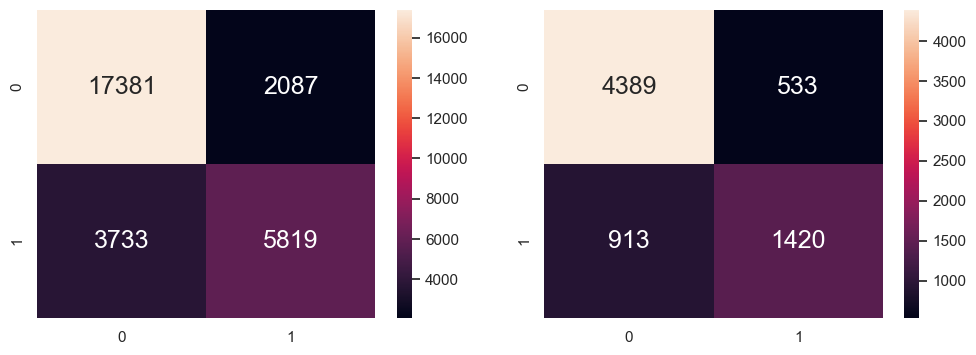

In [122]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print("Train and Test Data Confusion Matrix:")

#### Calculate General Metrics for Logistic Regression Model

In [123]:
# Calculate general metrics for the train set
print("**Training Set Metrics**")
print("Accuracy \t:", accuracy_score(Y_train, Y_train_pred))
print("Precision \t:", precision_score(Y_train, Y_train_pred))
print("Recall \t\t:", recall_score(Y_train, Y_train_pred))
print("F1 Score \t:", f1_score(Y_train, Y_train_pred))

print() # New Line

# Calculate general metrics for the test set
print("**Test Set Metrics**")
print("Accuracy \t:", accuracy_score(Y_test, Y_test_pred))
print("Precision \t:", precision_score(Y_test, Y_test_pred))
print("Recall \t\t:", recall_score(Y_test, Y_test_pred))
print("F1 Score \t:", f1_score(Y_test, Y_test_pred))

**Training Set Metrics**
Accuracy 	: 0.7994486560992419
Precision 	: 0.7360232734631925
Recall 		: 0.6091917922948074
F1 Score 	: 0.6666284797800435

**Test Set Metrics**
Accuracy 	: 0.8006891798759477
Precision 	: 0.7270865335381465
Recall 		: 0.6086583797685383
F1 Score 	: 0.6626224918338777
